# Excavation Supported by Cantilevered Sheet Pile Wall

This example is from file [Excavation Supported by Cantilevered Sheet Pile Wall](https://opensees.berkeley.edu/wiki/index.php?title=Excavation_Supported_by_Cantilevered_Sheet_Pile_Wall) on the OpenSees website and has been converted using [opst.pre.tcl2py](https://opstool.readthedocs.io/en/latest/src/api/pre.html#opstool.pre.tcl2py).

The python model script can be found here [excavation.py](https://ln5.sync.com/dl/41ad07bf0#ice8pjty-62im9fq9-qegdsiq6-rubwni3n).

In [1]:
import openseespy.opensees as ops

import opstool as opst

OPSVIS = opst.vis.pyvista

Load the FEM model function ``FEMmodel`` from file `excavation.py`.

[excavation.py](https://github.com/yexiang1992/opstool/blob/master/docs/examples/post/excavation/excavation.py)

In [2]:
from excavation import FEMmodel

FEMmodel()

InitialStateAnalysisWrapper nDmaterial - Written: C.McGann, P.Arduino, P.Mackenzie-Helnwein, U.Washington
ContactMaterial2D nDmaterial - Written: K.Petek, P.Mackenzie-Helnwein, P.Arduino, U.Washington
BeamContact2D element - Written: C.McGann, P.Arduino, P.Mackenzie-Helnwein, U.Washington


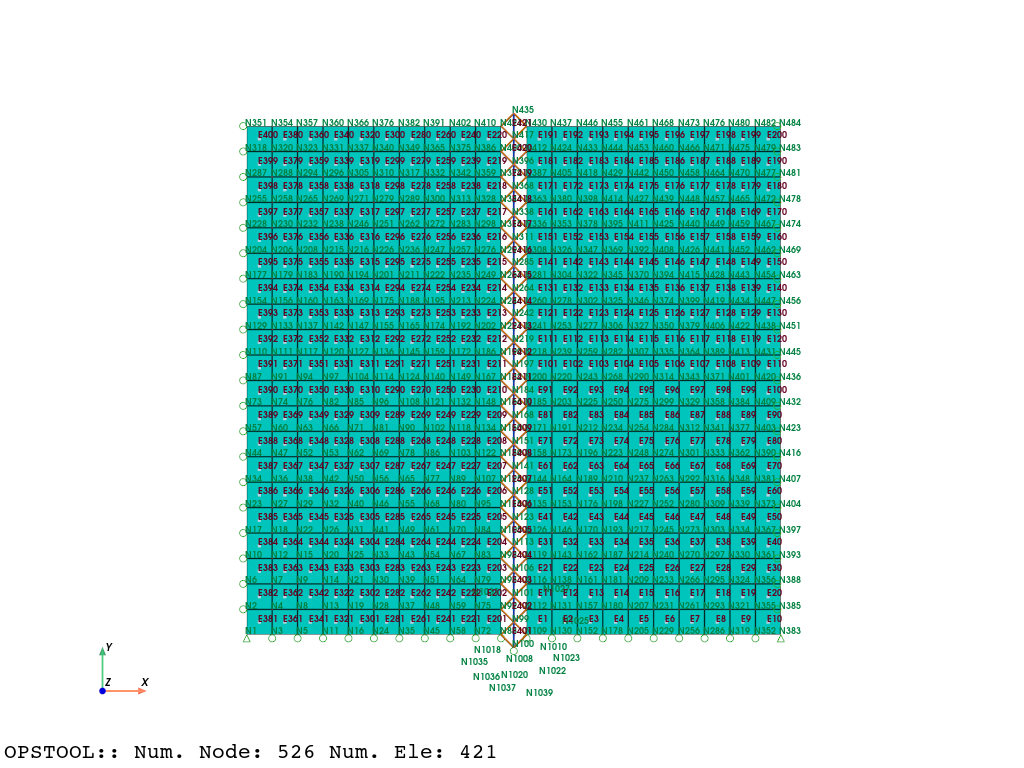

In [3]:
OPSVIS.set_plot_props(point_size=1, font_size=9, notebook=True)
OPSVIS.plot_model(show_node_numbering=True, show_ele_numbering=True).show(jupyter_backend="jupyterlab")

Create output database (ODB) file. 
Since some elements and nodes will be removed in subsequent analyses, ensure that ``model_update=True``.

In [4]:
ODB = opst.post.CreateODB(
    odb_tag=1,
    model_update=True,
    compute_mechanical_measures=True,
    project_gauss_to_nodes="copy",
)

## GRAVITY ANALYSIS (w/ INITIAL STATE ANALYSIS TO RESET DISPLACEMENTS)

In [5]:
# define analysis parameters for gravity phase
ops.constraints("Transformation")
ops.test("NormDispIncr", 1e-05, 50, 0)
ops.algorithm("Newton")
ops.numberer("RCM")
ops.system("BandGeneral")
ops.integrator("LoadControl", 1)
ops.analysis("Static")

Perform an initial state analysis, where elements with tags 1001--1042 are [BeamContact2D](https://opensees.berkeley.edu/wiki/index.php?title=BeamContact2D).

In [6]:
# turn on initial state analysis feature
ops.InitialStateAnalysis("on")
# ensure soil material intially considers linear elastic behavior
ops.updateMaterialStage("-material", 1, "-stage", 0)
# set contact elements to be frictionless for gravity analysis
ops.setParameter("-val", 0, "-eleRange", 1001, 1042, "friction")
# analysis 4 steps, and fetch response
for _ in range(4):
    ops.analyze(1)
    ODB.fetch_response_step()

InitialStateAnalysis ON


Update soil material to consider elastoplastic behavior and analyze a few more steps:

In [7]:
# update soil material to consider elastoplastic behavior and analyze a few more steps
ops.updateMaterialStage("-material", 1, "-stage", 1)
# analysis 4 steps, and fetch response
for _ in range(4):
    ops.analyze(1)
    ODB.fetch_response_step()
# designate end of initial state analysis (zeros displacements, keeps state variables)
ops.InitialStateAnalysis("off")
# turn on frictional behavior for beam contact elements
ops.setParameter("-val", 1, "-eleRange", 1001, 1042, "friction")

InitialStateAnalysis OFF
Domain::addParameter - parameter with tag 0 already exists in model


## REMOVE ELEMENTS TO SIMULATE EXCAVATION

In [8]:
# define analysis parameters for excavation phase
ops.wipeAnalysis()
ops.constraints("Transformation")
ops.test("NormDispIncr", 0.0001, 60)
ops.algorithm("KrylovNewton")
ops.numberer("RCM")
ops.system("BandGeneral")
ops.integrator("LoadControl", 1)
ops.analysis("Static")

We first define a function to avoid repetitive removal of elements and nodes, and then proceed with several steps of analysis.

In [9]:
def remove_components(ele_tags, node_tags, nsteps=4):
    for etag in ele_tags:
        ops.remove("element", etag)
    for ntag in node_tags:
        ops.remove("node", ntag)
    # run analysis after object removal
    for _ in range(nsteps):
        ops.analyze(1)
        ODB.fetch_response_step()

Remove objects associated with lift 1:

In [10]:
# remove objects associated with lift 1
# soil elements
ele_tags = [191, 192, 193, 194, 195, 196, 197, 198, 199, 200]
ele_tags += [1042]  # contact element
# soil nodes
node_tags = [430, 437, 446, 455, 461, 468, 473, 476, 480, 482, 484]
node_tags += [1042]  # lagrange multiplier node

remove_components(ele_tags, node_tags, nsteps=4)

print("Lift 1 removed")

Lift 1 removed


We can then remove the remaining 9 lifts：

In [11]:
# remove objects associated with lift 2
# soil elements
ele_tags = [181, 182, 183, 184, 185, 186, 187, 188, 189, 190]
ele_tags += [1040]  # contact element
# soil nodes
node_tags = [412, 424, 433, 444, 453, 460, 466, 471, 475, 479, 483]
node_tags += [1040]  # lagrange multiplier node

remove_components(ele_tags, node_tags, nsteps=4)

print("Lift 2 removed")

Lift 2 removed


In [12]:
# remove objects associated with lift 3
# soil elements
ele_tags = [171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
ele_tags += [1038]  # contact element
# soil nodes
node_tags = [387, 405, 418, 429, 442, 450, 458, 464, 470, 477, 481]
node_tags += [1038]  # lagrange multiplier node

remove_components(ele_tags, node_tags, nsteps=4)

print("Lift 3 removed")

Lift 3 removed


In [13]:
# remove objects associated with lift 4
# soil elements
ele_tags = [161, 162, 163, 164, 165, 166, 167, 168, 169, 170]
ele_tags += [1036]  # contact element
# soil nodes
node_tags = [363, 380, 398, 414, 427, 439, 448, 457, 465, 472, 478]
node_tags += [1036]  # lagrange multiplier node

remove_components(ele_tags, node_tags, nsteps=4)

print("Lift 4 removed")

Lift 4 removed


In [14]:
# remove objects associated with lift 5
# soil elements
ele_tags = [151, 152, 153, 154, 155, 156, 157, 158, 159, 160]
ele_tags += [1034]  # contact element
# soil nodes
node_tags = [336, 353, 378, 395, 411, 425, 440, 449, 459, 467, 474]
node_tags += [1034]  # lagrange multiplier node

remove_components(ele_tags, node_tags, nsteps=4)

print("Lift 5 removed")

Lift 5 removed


In [15]:
# remove objects associated with lift 6
# soil elements
ele_tags = [141, 142, 143, 144, 145, 146, 147, 148, 149, 150]
ele_tags += [1032]  # contact element
# soil nodes
node_tags = [308, 326, 347, 369, 392, 408, 426, 441, 452, 462, 469]
node_tags += [1032]  # lagrange multiplier node

remove_components(ele_tags, node_tags, nsteps=4)

print("Lift 6 removed")

Lift 6 removed


In [16]:
# remove objects associated with lift 7
# soil elements
ele_tags = [131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
ele_tags += [1030]  # contact element
# soil nodes
node_tags = [281, 304, 322, 345, 370, 394, 415, 428, 443, 454, 463]
node_tags += [1030]  # lagrange multiplier node

remove_components(ele_tags, node_tags, nsteps=4)

print("Lift 7 removed")

Lift 7 removed


In [17]:
# remove objects associated with lift 8
# soil elements
ele_tags = [121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
ele_tags += [1028]  # contact element
# soil nodes
node_tags = [260, 278, 302, 325, 346, 374, 399, 419, 434, 447, 456]
node_tags += [1028]  # lagrange multiplier node

remove_components(ele_tags, node_tags, nsteps=4)

print("Lift 8 removed")

Lift 8 removed


In [18]:
# remove objects associated with lift 9
# soil elements
ele_tags = [111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
ele_tags += [1026]  # contact element
# soil nodes
node_tags = [241, 253, 277, 306, 327, 350, 379, 406, 422, 438, 451]
node_tags += [1026]  # lagrange multiplier node

remove_components(ele_tags, node_tags, nsteps=4)

print("Lift 9 removed")

Lift 9 removed


In [19]:
# remove objects associated with lift 10
# soil elements
ele_tags = [101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
ele_tags += [1024]  # contact element
# soil nodes
node_tags = [218, 239, 259, 282, 307, 335, 364, 389, 413, 431, 445]
node_tags += [1024]  # lagrange multiplier node

remove_components(ele_tags, node_tags, nsteps=4)

print("Lift 10 removed")

Lift 10 removed


We can save all previous responses to a file:

zlib compression is used to reduce file size.

In [20]:
ODB.save_response(zlib=True)

OPSTOOL ::  All responses data with _odb_tag = 1 saved in .opstool.output/RespStepData-1.nc!

## Post-processing

In [21]:
import matplotlib.pyplot as plt

import opstool as opst
import opstool.vis.pyvista as opsvis


Since the result data has already been saved, we can read it at any time for post-processing:

In [22]:
opsvis.set_plot_props(point_size=0, line_width=5, cmap="turbo", notebook=True)
opsvis.set_plot_props(
    scalar_bar_kargs={
        "label_font_size": 12,
        "title_font_size": 13,
        "position_x": 0.85,  # 0--1
    }
)

### nodal responses

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

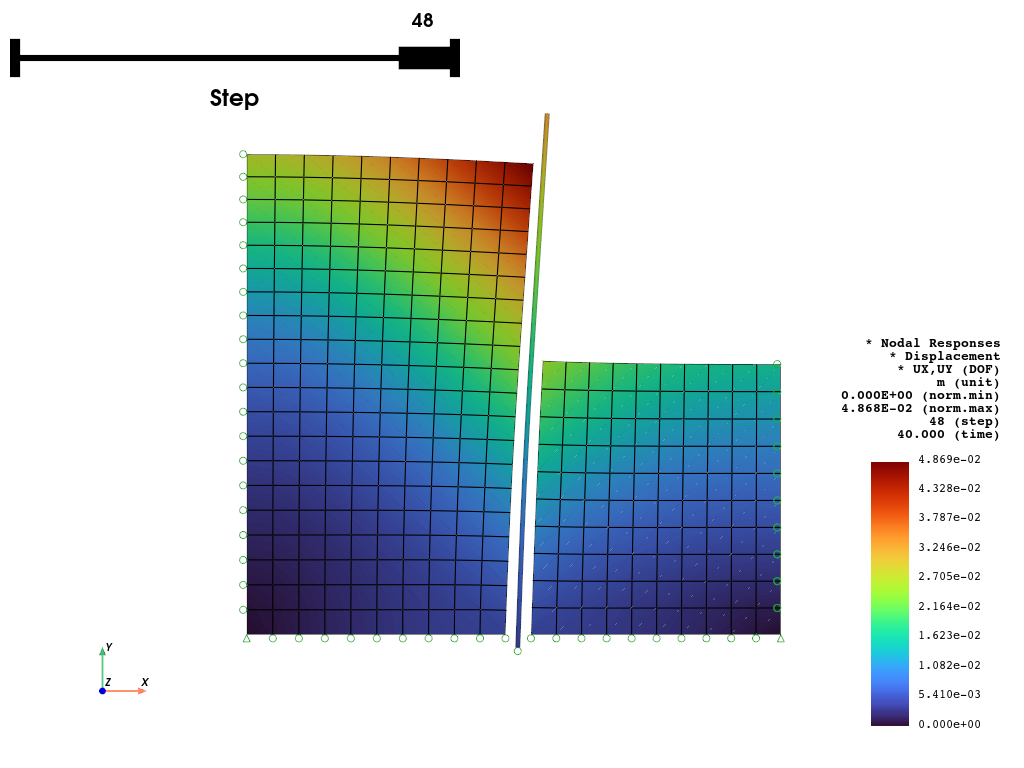

In [23]:
opsvis.plot_nodal_responses(
    odb_tag=1,
    slides=True,
    defo_scale=20,
    resp_type="disp",
    resp_dof=["UX", "UY"],
    unit_symbol="m",
).show(jupyter_backend="juoyterlab")

We can create animations:

In [24]:
opsvis.plot_nodal_responses_animation(
    odb_tag=1,
    framerate=20,
    defo_scale=25,
    savefig="NodalRespAnimation.gif",
    resp_type="disp",
    resp_dof=["UX", "UY"],
    unit_symbol="m",
).close()

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

Animation has been saved to NodalRespAnimation.gif!


![NodalRespAnimation](NodalRespAnimation.gif)

### Frame elements responses

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

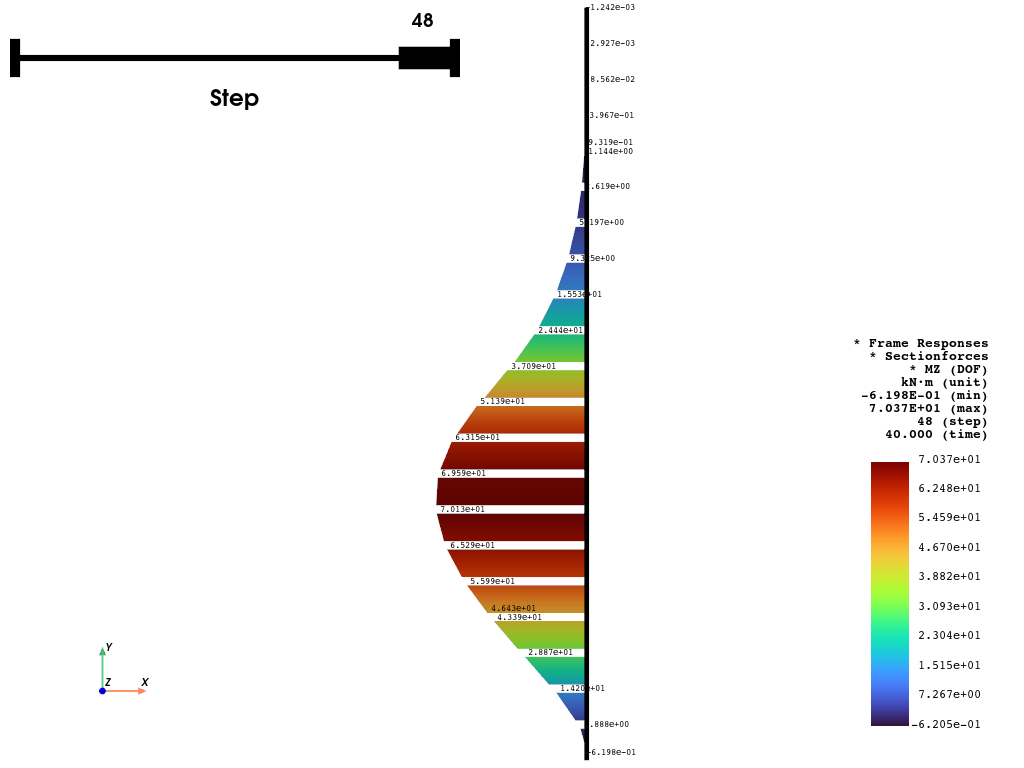

In [25]:
plotter = opsvis.plot_frame_responses(
    odb_tag=1,
    resp_type="sectionForces",
    resp_dof="MZ",
    unit_symbol="kN·m",
    show_values="eleMaxMin",
    scale=3,
    slides=True,
    style="surface",
    show_model=False,  # plot all model
    opacity=1.0,
    show_bc=False,
)
plotter.show(jupyter_backend="juoyterlab")

In [26]:
opsvis.plot_frame_responses_animation(
    odb_tag=1,
    resp_type="sectionForces",
    resp_dof="MZ",
    unit_symbol="kN·m",
    show_values=False,
    framerate=20,
    scale=3,
    style="surface",
    opacity=1.0,
    show_model=True,  # plot all model
    show_bc=False,
    savefig="FrameForcesMZ.gif",
).close()

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

Animation has been saved as FrameForcesMZ.gif!


![FrameForcesMZ](FrameForcesMZ.gif)

### Plane elements response

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

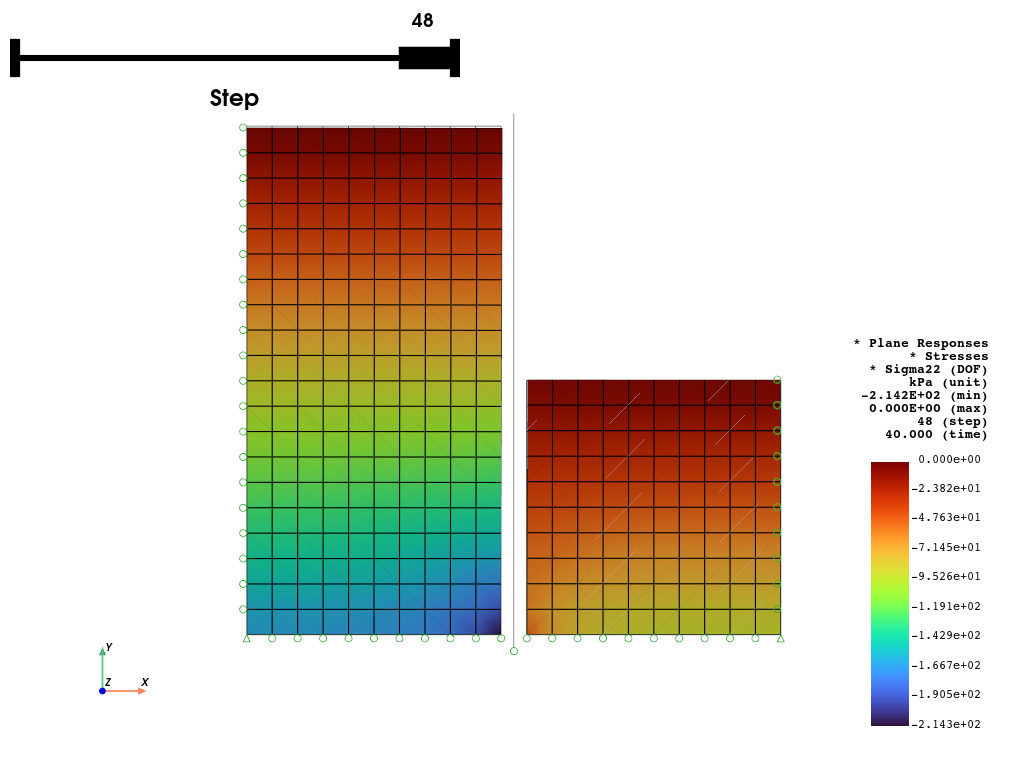

In [27]:
pl = opsvis.plot_unstruct_responses(
    odb_tag=1, slides=True, ele_type="Plane", resp_type="StressesAtNodes", resp_dof="sigma22", unit_symbol="kPa"
)
pl.show(jupyter_backend="jupyterlab")

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

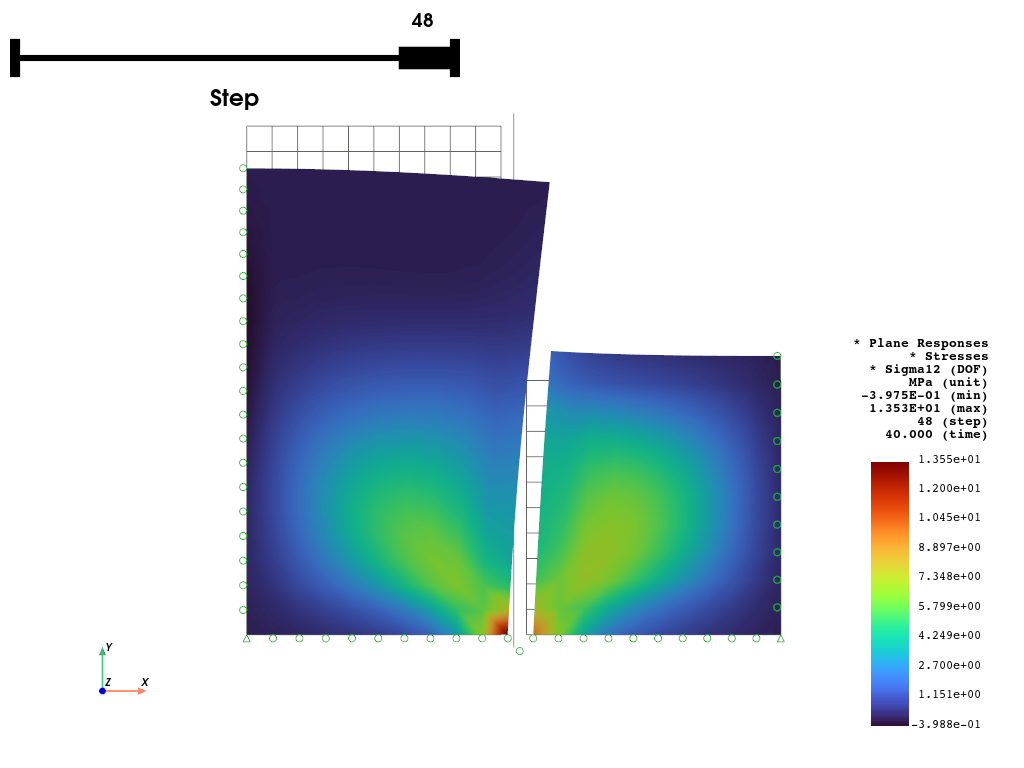

In [37]:
opsvis.set_plot_props(show_mesh_edges=False)
opsvis.plot_unstruct_responses(
    odb_tag=1,
    slides=True,
    ele_type="Plane",
    resp_type="StressesAtNodes",
    resp_dof="sigma12",
    show_defo=True,
    defo_scale=30,
    unit_symbol="MPa",
).show(jupyter_backend="jupyterlab")

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

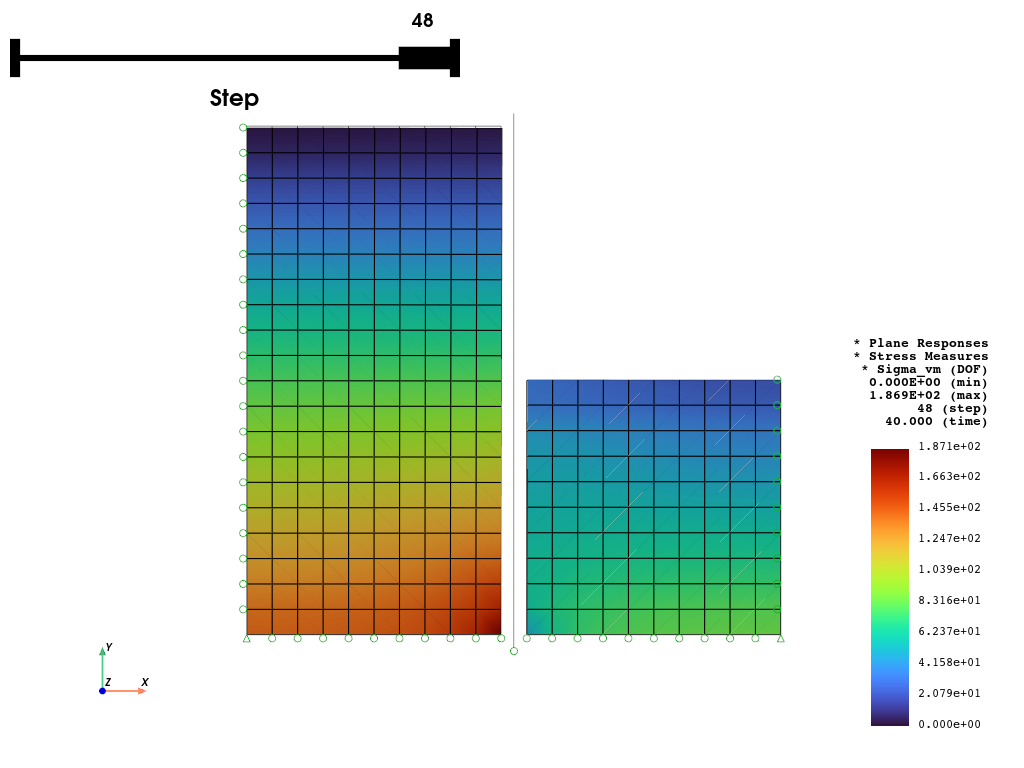

In [29]:
opsvis.plot_unstruct_responses(
    odb_tag=1, slides=True, ele_type="Plane", resp_type="StressesAtNodes", resp_dof="sigma_vm"
).show(jupyter_backend="jupyterlab")

### Read data from ODB

Reading the response of the contact element

In [30]:
data = opst.post.get_element_responses(odb_tag=1, ele_type="Contact")

OPSTOOL ::  Loading Contact response data from .opstool.output/RespStepData-1.nc ...

In [31]:
print(data)

<xarray.Dataset> Size: 91kB
Dimensions:       (time: 49, eleTags: 42, globalDOFs: 3, localDOFs: 3,
                   slipDOFs: 2)
Coordinates:
  * eleTags       (eleTags) int32 168B 1001 1002 1003 1004 ... 1040 1041 1042
  * globalDOFs    (globalDOFs) <U2 24B 'Px' 'Py' 'Pz'
  * localDOFs     (localDOFs) <U2 24B 'N' 'Tx' 'Ty'
  * slipDOFs      (slipDOFs) <U2 16B 'Tx' 'Ty'
  * time          (time) float32 196B 0.0 1.0 2.0 3.0 ... 37.0 38.0 39.0 40.0
Data variables:
    globalForces  (time, eleTags, globalDOFs) float32 25kB -0.0 -0.0 ... nan nan
    localForces   (time, eleTags, localDOFs) float32 25kB 0.0 0.0 ... nan nan
    localDisp     (time, eleTags, localDOFs) float32 25kB 0.0 0.0 ... nan nan
    slips         (time, eleTags, slipDOFs) float32 16kB 0.0 0.0 0.0 ... nan nan
Attributes:
    Px:       Global force in the x-direction on the constrained node
    Py:       Global force in the y-direction on the constrained node
    Pz:       Global force in the z-direction on the constrai

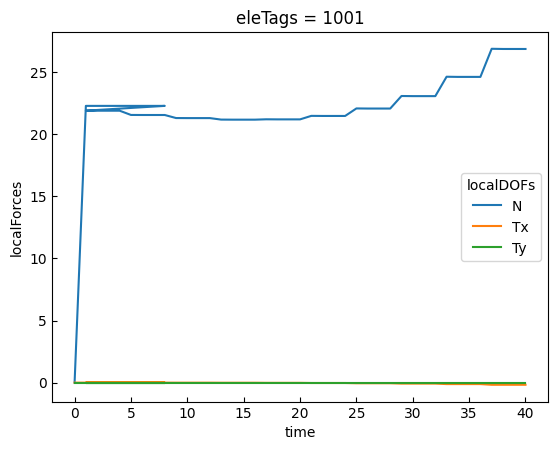

In [32]:
data["localForces"].sel(eleTags=1001).plot.line(x="time")
plt.show()

Let's examine the response of contact element #1034. Since it is removed during the fifth lift, its response is truncated at time=16, and subsequent data will be filled with ``numpy.nan``.

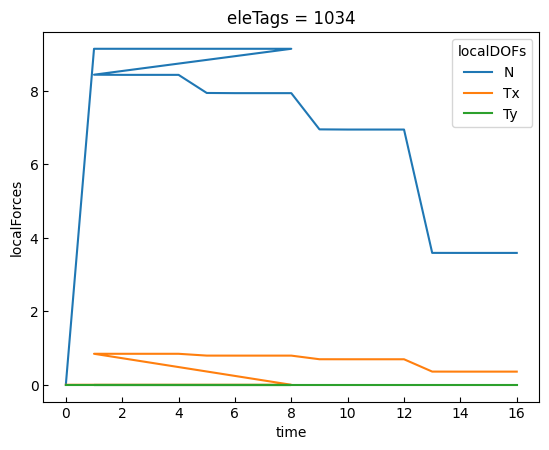

In [33]:
data["localForces"].sel(eleTags=1034).plot.line(x="time")
plt.show()

In [34]:
data["localForces"].sel(eleTags=1034).data

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 9.1395674e+00,  0.0000000e+00,  0.0000000e+00],
       [ 9.1395674e+00, -5.0713975e-16,  0.0000000e+00],
       [ 9.1395674e+00, -1.0979912e-15,  0.0000000e+00],
       [ 9.1395674e+00, -1.6520013e-15,  0.0000000e+00],
       [ 9.1395674e+00, -2.0548829e-15,  0.0000000e+00],
       [ 9.1395674e+00, -2.6420150e-15,  0.0000000e+00],
       [ 9.1395674e+00, -3.3185377e-15,  0.0000000e+00],
       [ 9.1395674e+00, -4.0539480e-15,  0.0000000e+00],
       [ 8.4345789e+00,  8.4345788e-01,  0.0000000e+00],
       [ 8.4302473e+00,  8.4302467e-01,  0.0000000e+00],
       [ 8.4302483e+00,  8.4302485e-01,  0.0000000e+00],
       [ 8.4302483e+00,  8.4302479e-01,  0.0000000e+00],
       [ 7.9376950e+00,  7.9376954e-01,  0.0000000e+00],
       [ 7.9328184e+00,  7.9328185e-01,  0.0000000e+00],
       [ 7.9328208e+00,  7.9328209e-01,  0.0000000e+00],
       [ 7.9328208e+00,  7.9328209e-01,  0.0000000e+00],
       [ 6.9473648e+00,  6.9473

Reading the response of the beam element

In [35]:
data = opst.post.get_element_responses(odb_tag=1, ele_type="Frame")
print(data)

OPSTOOL ::  Loading Frame response data from .opstool.output/RespStepData-1.nc ...

<xarray.Dataset> Size: 309kB
Dimensions:              (time: 49, eleTags: 21, localDofs: 12, basicDofs: 6,
                          secPoints: 3, secDofs: 6, locs: 3)
Coordinates:
  * eleTags              (eleTags) int32 84B 401 402 403 404 ... 418 419 420 421
  * localDofs            (localDofs) <U3 144B 'FX1' 'FY1' 'FZ1' ... 'MY2' 'MZ2'
  * basicDofs            (basicDofs) <U3 72B 'N' 'MZ1' 'MZ2' 'MY1' 'MY2' 'T'
  * secPoints            (secPoints) int32 12B 1 2 3
  * secDofs              (secDofs) <U2 48B 'N' 'MZ' 'VY' 'MY' 'VZ' 'T'
  * locs                 (locs) <U5 60B 'alpha' 'X' 'Y'
  * time                 (time) float32 196B 0.0 1.0 2.0 3.0 ... 38.0 39.0 40.0
Data variables:
    localForces          (time, eleTags, localDofs) float32 49kB -0.0 ... 0.0...
    basicForces          (time, eleTags, basicDofs) float32 25kB 0.0 ... 0.0
    basicDeformations    (time, eleTags, basicDofs) float32 25kB 0.0 ... 0.0
    plasticDeformation   (time, eleTags, basicDofs) float32 25kB 0.0 .

In [36]:
data = opst.post.get_element_responses(odb_tag=1, ele_type="Plane")
print(data)

OPSTOOL ::  Loading Plane response data from .opstool.output/RespStepData-1.nc ...

<xarray.Dataset> Size: 7MB
Dimensions:                (time: 49, eleTags: 400, GaussPoints: 4,
                            stressDOFs: 5, strainDOFs: 3, nodeTags: 462,
                            measures: 4)
Coordinates:
  * eleTags                (eleTags) int32 2kB 1 2 3 4 5 ... 396 397 398 399 400
  * GaussPoints            (GaussPoints) int32 16B 1 2 3 4
  * stressDOFs             (stressDOFs) <U7 140B 'sigma11' 'sigma22' ... 'eta_r'
  * strainDOFs             (strainDOFs) <U5 60B 'eps11' 'eps22' 'eps12'
  * nodeTags               (nodeTags) int32 2kB 1 2 3 4 5 ... 481 482 483 484
  * time                   (time) float32 196B 0.0 1.0 2.0 ... 38.0 39.0 40.0
  * measures               (measures) <U8 128B 'p1' 'p2' 'sigma_vm' 'tau_max'
Data variables:
    Stresses               (time, eleTags, GaussPoints, stressDOFs) float32 2MB ...
    Strains                (time, eleTags, GaussPoints, strainDOFs) float32 941kB ...
    StressesAtNodes        (time, nodeTags, stressDOFs) float32 4